<a href="https://colab.research.google.com/github/anujshetty/SearchAndResQ/blob/main/Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import time

In [ ]:
ls

sample_data/


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display

from Gridworld import Gridworld
from utils import visualize_grid, policy_score, simulate_policy
from __future__ import unicode_literals
from Learning import QLearning, EpsilonGreedyExploration, FixedPolicy


/content/utils.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


KeyboardInterrupt: ignored

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 127810 (\N{FALLEN LEAF}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 129495 (\N{PERSON CLIMBING}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  func(*args, **kwargs)


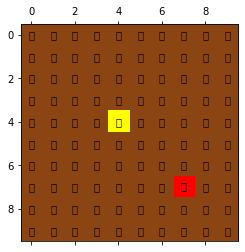

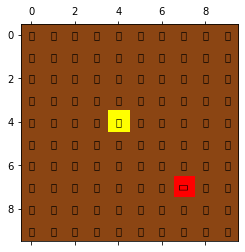

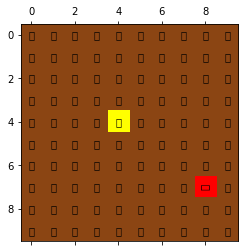

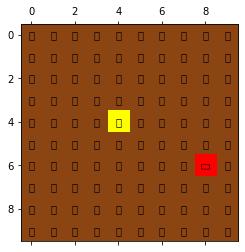

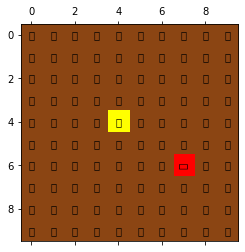

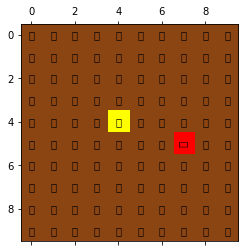

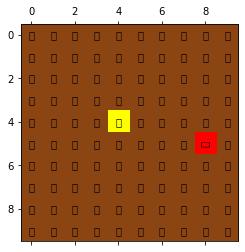

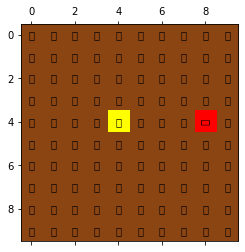

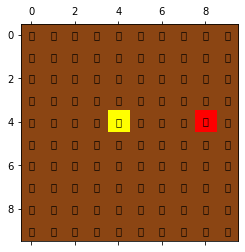

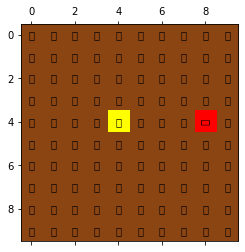

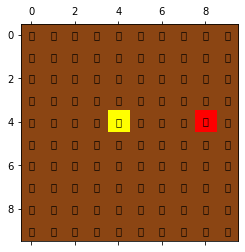

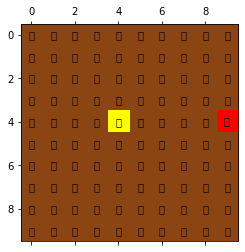

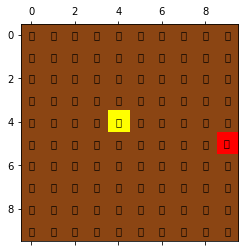

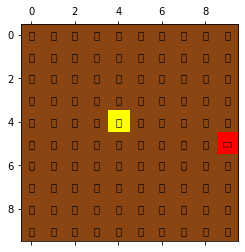

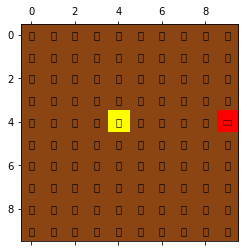

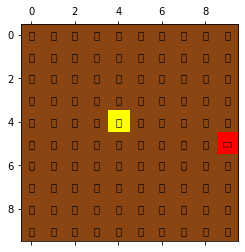

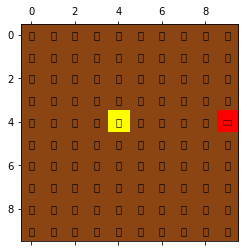

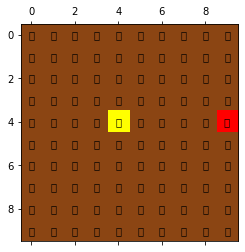

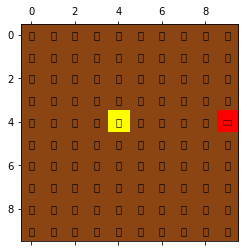

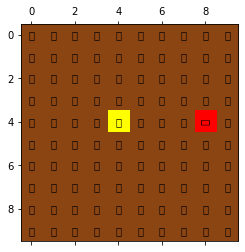

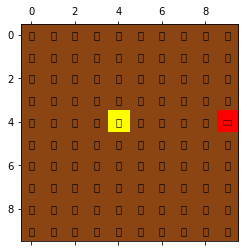

In [4]:
# simulate random policy until reached target state
g = Gridworld(gridworld_length=10)      

policy_score = simulate_policy(g, policy_type="random", run_to_completion=True)

print(policy_score)


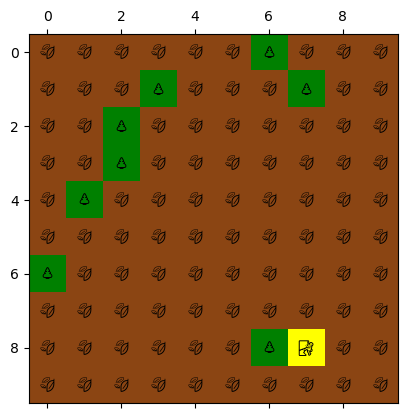

In [ ]:
visualize_grid(g)

In [ ]:
g_rand = Gridworld(gridworld_length=3, gridworld_width=3, num_obstacles=0,
                 collisionReward= -1, destinationReward= 100, defaultReward= -0.1, outOfBoundsReward = -1, failChance= 0.1, gamma= 0.9)
eps_greedy_policy =  EpsilonGreedyExploration(0.8, alpha=0.99)
qlearning_model = QLearning(g_rand, 0.2)
print(qlearning_model.Q.shape)
print(qlearning_model.Q[tuple([0, 0, 0, 0, 0, 0, 0])])

In [ ]:
for i in range(1000):
    g_rand.reset_position()
    simulate_policy(g_rand, policy_type="epsilon-greedy", model=qlearning_model, policy=eps_greedy_policy, run_to_completion=False, num_iters=1000, visualize=False)

In [ ]:
learned_policy = FixedPolicy(qlearning_model.extract_policy(), g_rand)
print(learned_policy.policy)
#print(qlearning_model.Q)

[[[[[[1 0 5]
     [0 0 0]
     [2 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[1 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[1 0 0]
     [0 0 0]
     [2 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[1 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[5 0 0]
     [0 0 0]
     [1 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[1 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[1 0 1]
     [0 0 0]
     [1 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[4 0 0]
     [0 0 0]
     [0 0 0]]]]



  [[[[1 0 1]
     [0 0 0]
     [1 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[2 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[0 0 0]
     [0 0 0]
     [1 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[1 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[4 0 1]
     [0 0 0]
     [5 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[5 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[0 0 1]
     [0 0 0]
     [1 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[1 0 0]
     [0 0 0]
     [0 0 0]]]]

In [ ]:
# reset agent position in existing grid
g_rand.reset_position()

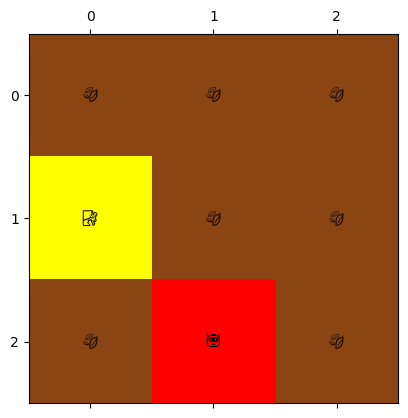

In [ ]:
visualize_grid(g_rand)

KeyboardInterrupt: 

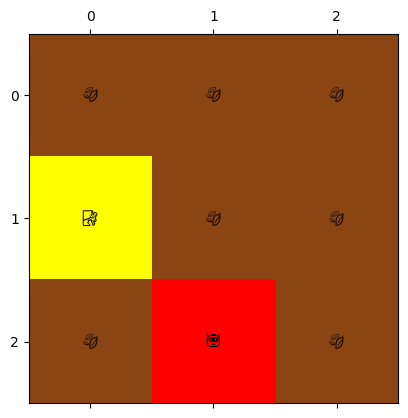

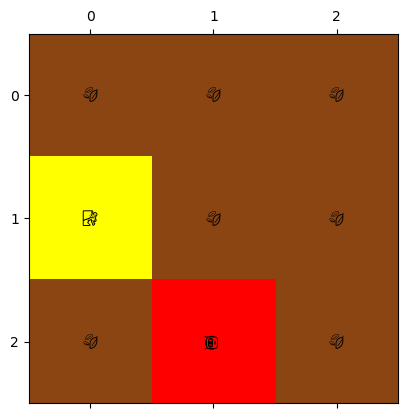

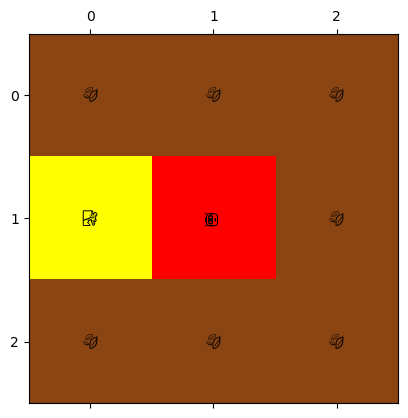

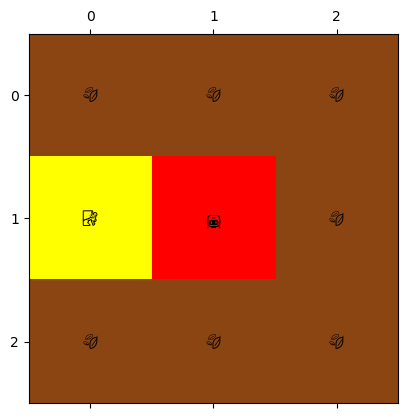

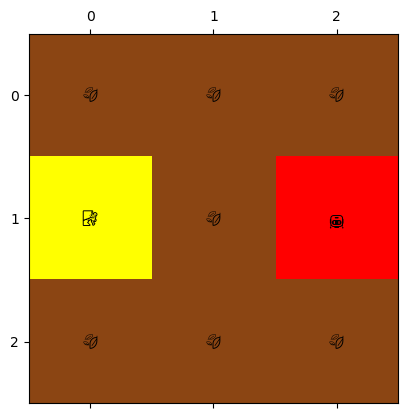

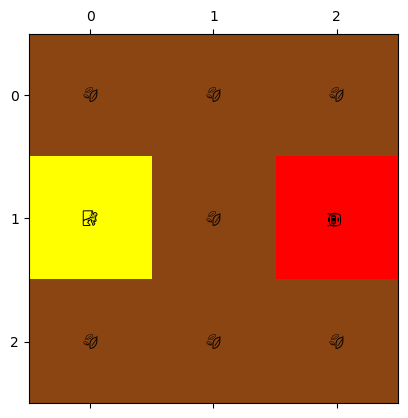

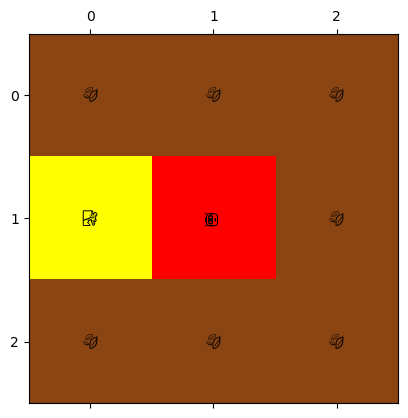

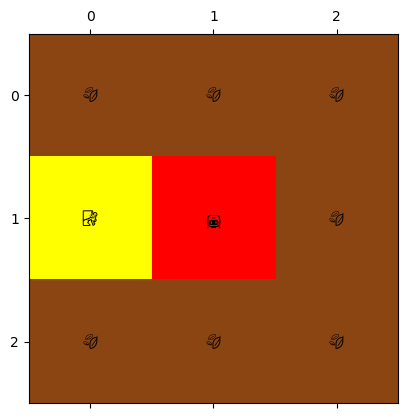

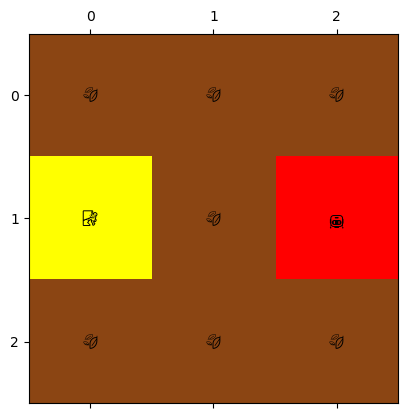

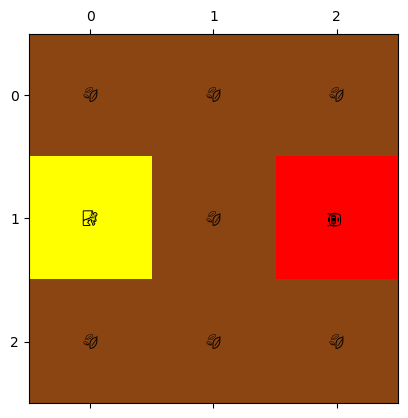

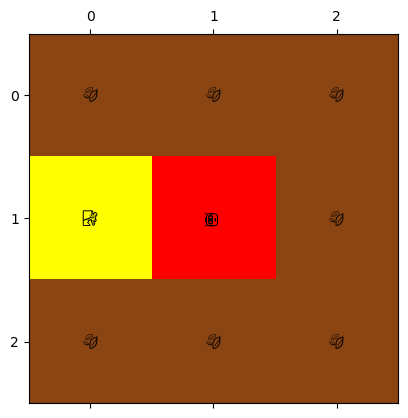

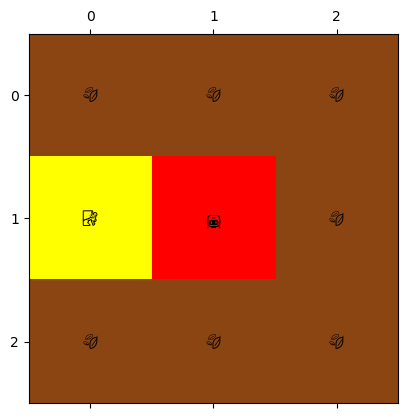

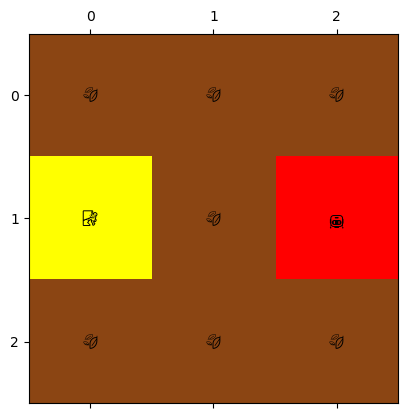

Error in callback <function flush_figures at 0x00000200F2799DC0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
policy_score_learned = simulate_policy(g_rand, policy_type="fixed", model=None, policy=learned_policy, run_to_completion=True)

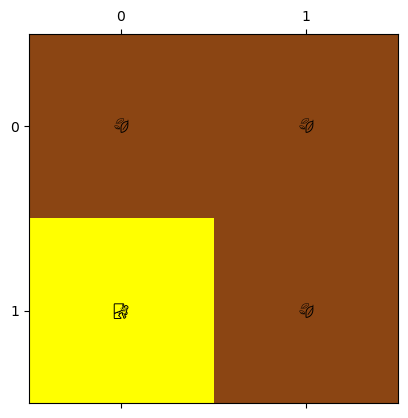

In [ ]:
visualize_grid(g_rand)

In [ ]:
print(policy_score_learned)

89.9
